# lab1_multi

In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
data = pd.read_csv('ex1data2.txt')
print(data.shape)
X  = np.array(data.iloc[:,0:2])
m = X.shape[0]
y = np.array(data.iloc[:,2]).reshape(m,1)
print(X.shape)
print(y.shape)

(46, 3)
(46, 2)
(46, 1)


## 1. Feature Normalize 

In [6]:
def featureNormalize(X):
    '''
    mu: each column mean of X, size=(1,2)
    std: each column standard deviation of X, size=(1,2)
    '''
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [20]:
# 为x左边增加全1的列
X, mu, sigma = featureNormalize(X)
X = np.hstack((np.ones((m,1)), X))
print(X.shape)

(46, 3)


## 2. Gradient Descent

In [21]:
def computeCost(X, y, theta):
    """
    X.shape = (m,3)
    y.shape = (m,1)
    theta.shape = (3,1)
    """
    m = X.shape[0]
    h = np.dot(X, theta)
    return np.sum(np.square(h - y)) / (2*m)

In [28]:
def gradientDescentMulti(X, y, theta, alpha, iteratons):
    """
    X.shape = (m,3)
    y.shape = (m,1)
    theta.shape = (3,1)
    alpha: learning rate
    iterations: num of iterate
    """
    m = X.shape[0]
    J_history = np.zeros((iteratons, 1))
    for iter in range(iteratons):
        h = np.dot(X, theta)
        tmp = np.sum((h-y)*X, axis=0).reshape(3,1)
        theta = theta - alpha/m * tmp
        J_history[iter] = computeCost(X,y,theta)
    return J_history, theta 

In [34]:
alpha = 0.01
num_iters = 400
theta = np.zeros((3,1))
J_history, theta = gradientDescentMulti(X, y, theta, alpha, num_iters)
# theta, J_history

In [36]:
# test
X_predict = (np.array([1650,3]) - mu) / sigma
X_predict = X_predict.reshape(1,2)
price = np.dot(np.append(1,X_predict), theta)
price

array([288275.83497249])

Text(0, 0.5, 'Cost J')

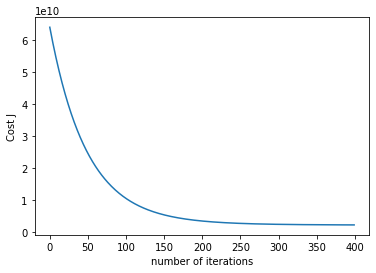

In [37]:
plt.plot(np.array(list(range(num_iters))), J_history)
plt.xlabel('number of iterations')
plt.ylabel('Cost J')

## 3. Normal Equation
$$
\theta=(X^{T}X)^{-1}X^{T}y
$$

In [38]:
def normalEqn(X):
    theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X),X)), np.transpose(X)), y)
    return theta

In [39]:
# test, use predict data above
normTheta = normalEqn(X)
normPrice = np.dot(np.append(1,X_predict), normTheta)
normPrice

array([292195.80095132])